<a href="https://colab.research.google.com/github/wolfos20/Oib-Sip-Internship/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NAME - UTTAM KUMAR

### DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

### TASK 3

### PROJECT NAME - Sales Prediction

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv(r"/content/drive/MyDrive/oib sip files/Advertising.csv")

In [34]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [36]:
df=df.drop(['Unnamed: 0'],axis= 1)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [37]:
df.shape

(200, 4)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

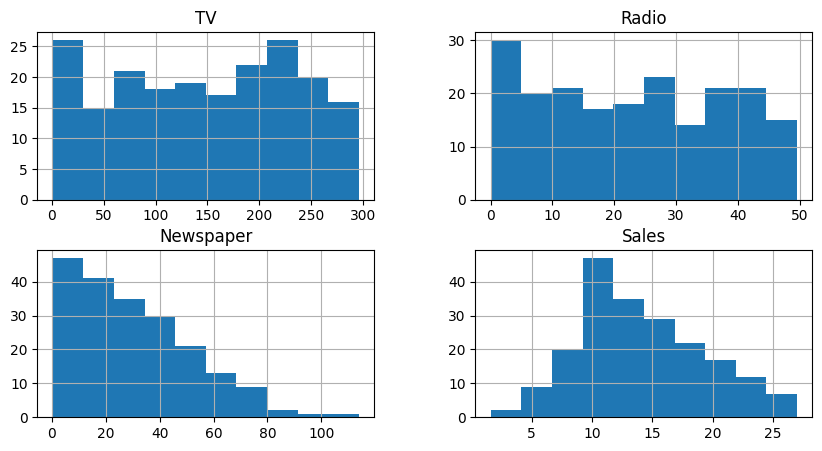

In [39]:
df.hist(figsize=(10,5))

In [40]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## VISUALIZATION OF DATASET

<Axes: >

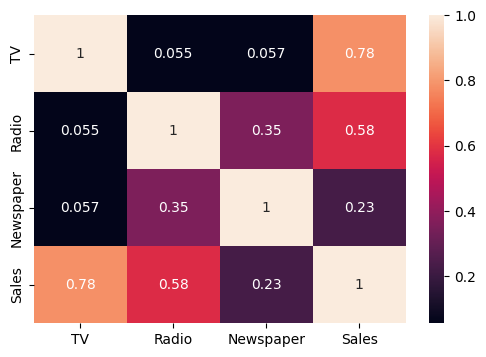

In [41]:
# Plotting the Correlation Matrix
fig, ax =plt.subplots(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)


<Figure size 700x300 with 0 Axes>

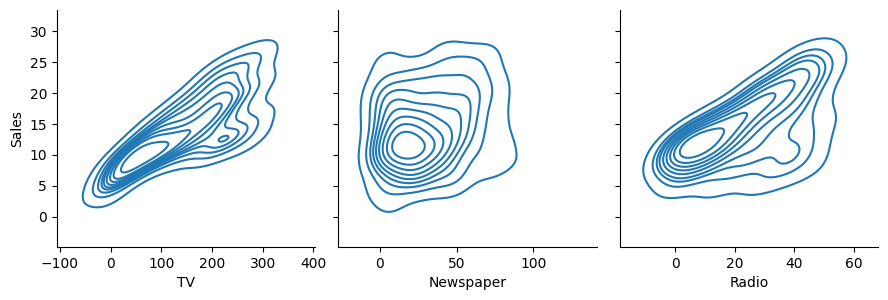

In [42]:
plt.figure(figsize=(7,3))
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, kind='kde')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

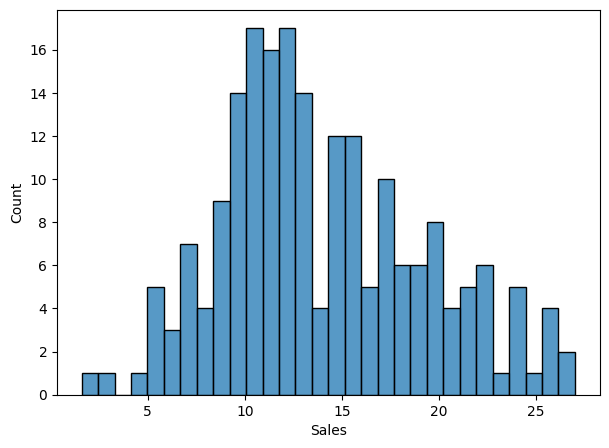

In [43]:
plt.figure(figsize=(7,5))
sns.histplot(df.Sales,bins=30)

### SPLITTING DATA

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

TRAINING THE DATA

In [71]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
y_pred


array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

In [73]:
print(model.intercept_)
print(model.coef_)

2.778303460245283
[0.04543356 0.19145654 0.00256809]


In [82]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})
act_predict.head()

,Actual,Predict
0,16.9,16.383482
1,22.4,20.924350
2,21.4,21.614954
3,7.3,10.490700
4,24.7,22.176905


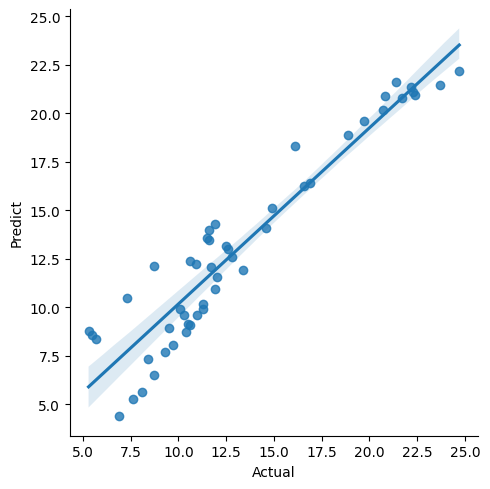

In [75]:
sns.lmplot(data = act_predict, x= 'Actual', y = "Predict")

### MODEL EVALUATION

In [76]:
from sklearn import metrics


In [77]:
print("Mean_absolute_error:",metrics.mean_absolute_error(y_test,y_pred))


Mean_absolute_error: 1.4023124989385076


In [78]:
print("Mean_squared_error:",metrics.mean_squared_error(y_test,y_pred))


Mean_squared_error: 2.880023730094193


In [79]:
print("Squre_Mean_absolute_error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


Squre_Mean_absolute_error: 1.1841927625764768


In [80]:
print("r2_score:",metrics.r2_score(y_test,y_pred))

r2_score: 0.8935163320163657


Text(0.5, 1.0, 'Model Performance')

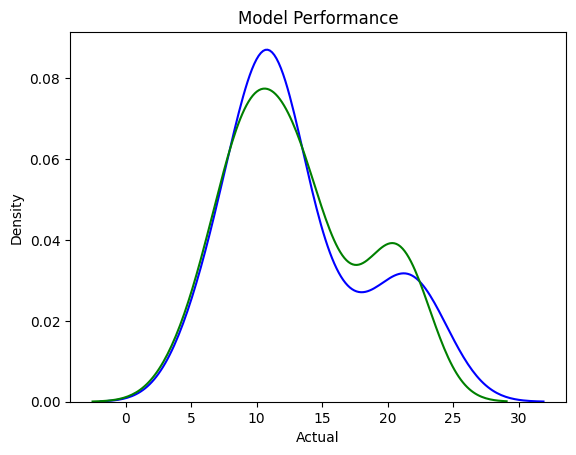

In [84]:
ax = sns.kdeplot(act_predict['Actual'], color='blue', label='Actual Price')
sns.kdeplot(act_predict['Predict'], color='green', label='Predicted Price', ax=ax)
plt.title("Model Performance")